# Cats vs. Dogs CNN Classifier

Notebook by Richard Kaldenhoven

Version 1: February 23, 2020

## Background

This notebook contains code adapted from the examples in Section 5.2 of "Deep Learning with Python" by Francois Chollet [1]. The focus of the section is on techniques to improve the accuracy of a convolutional neural network for computer vision when there is not enough image data available. 

While working through the examples, performance limitations of the laptop used were encountered, making the code run for an extremely long time. In order to speed up the time for executing the code, the capabilities of [Kaggle Notebooks](https://www.kaggle.com/notebooks) were used, which provide access to GPU's that provide faster processing speed. The code that follows has been modified slightly from the original source to work within the Kaggle Notebook environment.

## 1. Define problem and assemble a dataset

The goal of this notebook is to build a convolutional neural network (CNN) using the Keras deep learning framework that can classify pictures of cats and dogs,  so the problem can be defined as a binary classification problem. The dataset used comes from a much larger dataset used in a Kaggle competition that contained 25000 training images in total, 12500 of cats and 12500 of dogs. At the time of writing, the original data is still available (https://www.kaggle.com/c/dogs-vs-cats/data).

In this notebook, three smaller subsets of the original dataset are created, with balanced classes:
1. Training set: 2000 images (1000 cats, 1000 dogs)
2. Validation set: 1000 images (500 cats, 500 dogs)
3. Test set: 1000 images (500 cats, 500 dogs)



## 2. Choose a measure of success

Since the problem is a balanced class binary classification, the accuracy will be the model performance metric that is monitored to measure the success of the models that are developed.

## 3. Evaluation protocol

After training models on the training data, the model accuracy will be monitored on the validation data to evaluate the performance. Once a final model configuration is developed, it will be evaluated on the test data.

## 4. Prepare data

As mentioned above, this notebook was developed in the Kaggle Notebook environment, and so the procedure for loading data is slightly different than on working on a local computer, as any files needed must be uploaded into the Kaggle environment. Essentially, the folder structure and files within them need to mirror the working directory that would exist locally. 

To prepare the data, the following steps were taken:

1. Download the original dataset from Kaggle
2. Create three train/validation/test folders:
    - 2a. Create a `train` folder, and then `cats` and `dogs` subfolders within.
    - 2b. Create a `validation` folder, and then `cats` and `dogs` subfolders within.
    - 2c. Create a `test` folder, and then `cats` and `dogs` subfolders within.
3. Fill the folders with the appropriate images:
    - 3a. Copy the first 1000 cat images from the original dataset into the `/train/cats` folder
    - 3b. Copy the next 500 cat images from the original dataset into the `/validation/cats` folder
    - 3c. Copy the next 500 cat images from the original dataset into the `/test/cats` folder 
    - 3d. Copy the first 1000 dog images from the original dataset into the `/train/dogs` folder
    - 3e. Copy the next 500 dog images from the original dataset into the `/validation/dogs` folder
    - 3f. Copy the next 500 dog images from the original dataset into the `/test/dogs` folder
4. Upload files into the Kaggle environment, mirroring what exists locally.

The code below executes the next steps:
5. Run code provided by Kaggle to list working directory contents (output hidden for clarity)
6. Define `train_dir`, `validation_dir` and `test_dir` variables containing folder paths for use later
7. Check files and folders by printing out number of images in each subfolder

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_dir = '/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/train/'
validation_dir = '/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/'
test_dir = '/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/test/'

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## 5. Developing a baseline model

To start a baseline model is developed, using three hidden layers, and input data with size 150 x 150.

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

The `ImageDataGenerator` class is used to create generator objects that turn images into preprocessed tensors that can be used within Keras. The generator object will loop endlessly through the directory that is specified, generating a batch of images at a time. The image folder locations defined previously, `train_dir` and `validation_dir`, are used below, and a batch size of 20 is chosen.

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


To train the model, the `train_generator` object is passed in, rather than the usual numpy array. The generator has a batch size of 20, so the `steps_per_epoch` parameter must be set to 100 to equal to 2000 training samples. In other words, each epoch will take 100 steps of 20 images at a time to make one complete pass through 2000 training samples.

In [8]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 23s 192ms/step - loss: 0.7028 - acc: 0.5274 - val_loss: 0.6720 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6712 - acc: 0.6175 - val_loss: 0.6952 - val_acc: 0.5060
Epoch 3/30
100/100 [==============================] - 10s 105ms/step - loss: 0.6306 - acc: 0.6485 - val_loss: 0.6053 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5677 - acc: 0.7086 - val_loss: 0.5925 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5301 - acc: 0.7511 - val_loss: 0.5923 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 11s 105ms/step - loss: 0.5064 - acc: 0.7415 - val_loss: 0.6259 - val_acc: 0.6550
Epoch 7/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5058 - acc: 0.7549 - val_loss: 0.5661 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 1

In [9]:
model.save('cats_and_dogs_small_1.h5')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def create_val_plots(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    plt.figure()
    plt.plot(epochs, loss_values, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

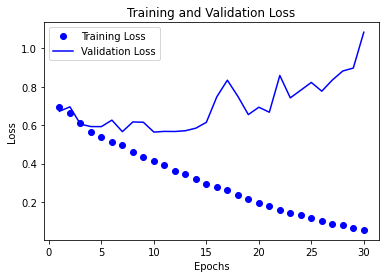

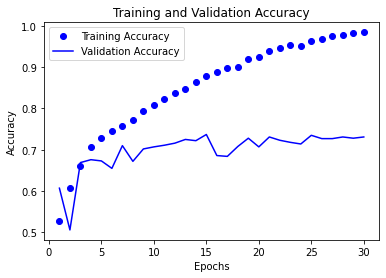

In [11]:
create_val_plots(history)

From the plots above it is clear that the baseline model begins to overfit after about 5 epochs. Further work must be done to reduce overfitting in order to improve the performance.

## 6. Reduce overfitting of model

To reduce overfitting in the baseline model, more data could used in training, but since we are restricted to using a smaller dataset in this problem, another solution must be found. Data augmentation is a technique of generating new image data to train the model with by randomly transforming the original images to new ones that are still recognizable . For example, an image could be rotated, shifted horizontally or vertically, or zoomed in.

In this case, several data augmentation parameters are added, using the same `ImageDataGenerator` class, as before. The  code below illustrates the use of data augmentation on a sample image. The random transformations are explained briefly below:
* `rotation_range` is the degree value (0-180) range to randomly rotate pictures, set to 40 degrees
* `width_shift_range` is the range, as a fraction of the total image width, to randomly translate the image, set to 0.2
* `height_shift_range` is the range, as a fraction of the total image height, to randomly translate the image, set to 0.2
* `shear_range` is a counterclockwise degree angle of rotation to shear image (turn from rectangle into more of a parallelogram shape), set to 0.2
* `zoom_range` is the range of a random zoom, set to 0.2
* `horizontal_flip` is a boolean value set to True to allow random horizontal image flips
* `fill_mode` controls how image pixels outside the original image boundary are filled after transformation. 'nearest' fills pixels with the same value as the nearest one in the original image

In [12]:
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

Original Image:
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/train/cats/cat.294.jpg


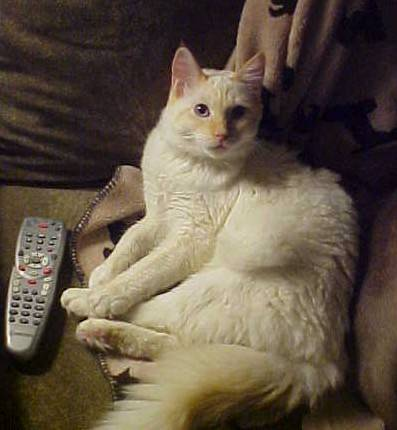

In [13]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]


print('Original Image:')
print(img_path)
from IPython.display import Image
from IPython.display import display
orig = Image(filename=img_path, width=150, height=150)
display(orig)




Augmented versions of Original Image:


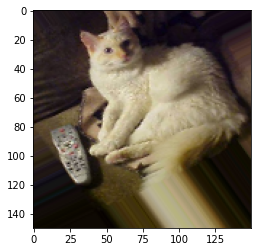

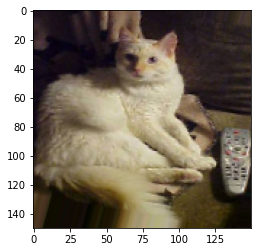

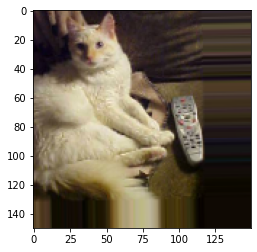

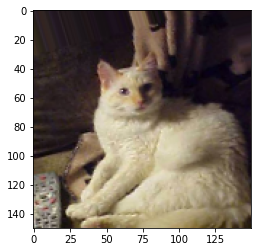

In [14]:
img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

print('Augmented versions of Original Image:')
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

The following code utilizes data augmentation to train the CNN. A Dropout layer has been added prior to the Dense layers as an additional regularization technique to fight overfitting.

The goal of data augmentation is to make sure that during training, the network does not see the same image twice. There are no new images being added to the training set, there are still the same number of training examples. For each epoch, a new set of random images are generated, so that epoch after epoch, the network is repeatedly exposed to new images.

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [16]:
# With image augmentation

train_datagen = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 22s 207ms/step - loss: 0.6944 - acc: 0.5134 - val_loss: 0.6851 - val_acc: 0.5040
Epoch 2/100
100/100 [==============================] - 21s 212ms/step - loss: 0.6822 - acc: 0.5586 - val_loss: 0.6968 - val_acc: 0.5110
Epoch 3/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6672 - acc: 0.5969 - val_loss: 0.6805 - val_acc: 0.5590
Epoch 4/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6649 - acc: 0.6081 - val_loss: 0.6361 - val_acc: 0.6220
Epoch 5/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6410 - acc: 0.6321 - val_loss: 0.6247 - val_acc: 0.6350
Epoch 6/100
100/100 [==============================] - 20s 196ms/step - loss: 0.6296 - acc: 0.6369 - val_loss: 0.6292 - val_acc: 0.6330
Epoch 7/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6187 - acc: 0.6642 -

In [17]:
model.save('cats_and_dogs_small_2.h5')

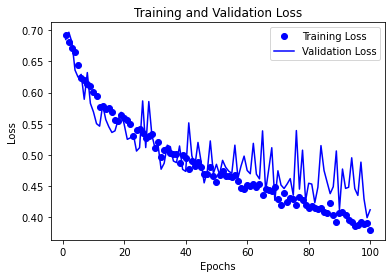

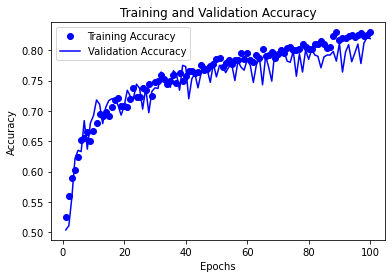

In [18]:
create_val_plots(history)

After using data augmentation and Dropout, the plots above show that the network is no longer overfitting. The accuracy on the validation set has improved to 81.90%, compared to 73.10% on the baseline model.

## 7. Improve model performance

In the absence of more training data, another option to improve model performance used here is to add a pretrained CNN to the existing model. The idea of using a pretrained CNN is to try and adapt the features learned from a different dataset to the one that is used here. If the dataset used in the pretrained CNN is large enough and general enough, then its features have a good chance of being reusable in a different problem.

Adding a pretrained model to the existing network developed so far is achieved by loading only the convolutional layers of a model previously trained on a larger image dataset into the variable `conv_base`. The convolutional base is used in two different ways: 
1. "Fast" feature extraction with no data augmentation - In this case predictions are generated from `conv_base`, saved in a numpy array, and then used as input to the CNN developed previously. The predictions from `conv_base` represent the features of the training data as interpreted by the pretrained CNN.
2. Feature extraction using data augmentation - add `conv_base` to the existing model as a new layer, allowing the model to use the data augmentation processing step as before, and the whole model to be fed the training data in one step. Since `conv_base` is added as a layer, it must be "frozen" or set to not be trained, in order to preserve the features from the pretrained CNN.

### 7.1 Fast feature extraction with no data augmentation

In [19]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
# Fast feature extraction without data augmentation

train_dir = '/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/train/'
validation_dir = '/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/'
test_dir = '/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/test/'

datagen = ImageDataGenerator(rescale=1/255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 4, 4, 512))
    labels = np.zeros((sample_count))
    generator = datagen.flow_from_directory(directory, 
                                            target_size=(150, 150), 
                                            batch_size=batch_size, 
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [23]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(train_features, 
                    train_labels, 
                    epochs=30, 
                    batch_size=20, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.7077 - acc: 0.5917 - val_loss: 0.4525 - val_acc: 0.8420
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4660 - acc: 0.7650 - val_loss: 0.3776 - val_acc: 0.8410
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3577 - acc: 0.8507 - val_loss: 0.3239 - val_acc: 0.8780
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3195 - acc: 0.8660 - val_loss: 0.3063 - val_acc: 0.8940
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2840 - acc: 0.8882 - val_loss: 0.2835 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2591 - acc: 0.8906 - val_loss: 0.2769 - val_acc: 0.8820
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2439 - acc: 0.8986 - val_loss: 0.2644 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

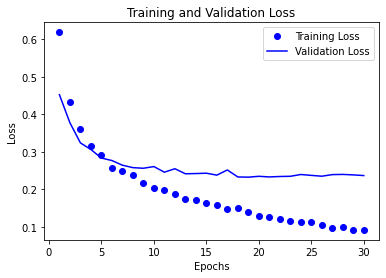

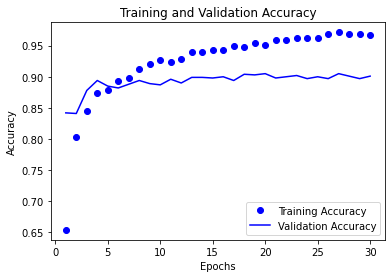

In [24]:
create_val_plots(history)

### 7.2 Feature extraction using data augmentation

In [25]:
# Feature extraction with data augmentation

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [27]:
print('# of trainable weights before freezing conv_base: ', len(model.trainable_weights))
conv_base.trainable = False
print('# of trainable weights after freezing conv_base: ', len(model.trainable_weights))

# of trainable weights before freezing conv_base:  30
# of trainable weights after freezing conv_base:  4


In [28]:
train_datagen = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 22s 217ms/step - loss: 0.6385 - acc: 0.6265 - val_loss: 0.4442 - val_acc: 0.8350
Epoch 2/30
100/100 [==============================] - 25s 246ms/step - loss: 0.4956 - acc: 0.7751 - val_loss: 0.3739 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 21s 211ms/step - loss: 0.4535 - acc: 0.7887 - val_loss: 0.3266 - val_acc: 0.8710
Epoch 4/30
100/100 [==============================] - 25s 249ms/step - loss: 0.4079 - acc: 0.8112 - val_loss: 0.3092 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 21s 213ms/step - loss: 0.3708 - acc: 0.8452 - val_loss: 0.2928 - val_acc: 0.8750
Epoch 6/30
100/100 [==============================] - 21s 206ms/step - loss: 0.3632 - acc: 0.8541 - val_loss: 0.2838 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 24s 243ms/step - loss: 0.3613 - acc: 0.8415 - val_lo

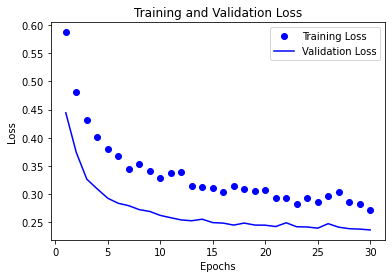

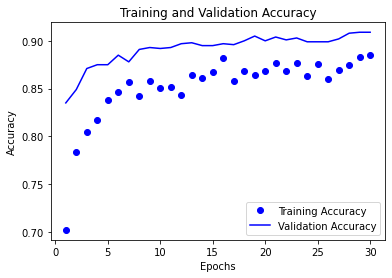

In [29]:
create_val_plots(history)

### 7.3 Fine tuning

A final step to improve model performance is to employ fine tuning, meaning allowing some of the layers in the pretrained CNN to be trained so their representations are better adapted to the training set used in this problem. In this case the last three layers of `conv_base` are set to be trainable. The deeper layers of the pretrained CNN contain more specific representations from the data it was trained on, so these layers would benefit more from training on the current training set in this problem.

In [30]:
# Fine tuning
# Fine tune the last three convolutional layers (freeze up to block4_pool)

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [31]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 218ms/step - loss: 0.3066 - acc: 0.8699 - val_loss: 0.2111 - val_acc: 0.9080
Epoch 2/100
100/100 [==============================] - 22s 218ms/step - loss: 0.2555 - acc: 0.8915 - val_loss: 0.2107 - val_acc: 0.9080
Epoch 3/100
100/100 [==============================] - 25s 255ms/step - loss: 0.2242 - acc: 0.9143 - val_loss: 0.2380 - val_acc: 0.9050
Epoch 4/100
100/100 [==============================] - 21s 212ms/step - loss: 0.2253 - acc: 0.9015 - val_loss: 0.1929 - val_acc: 0.9180
Epoch 5/100
100/100 [==============================] - 22s 216ms/step - loss: 0.2014 - acc: 0.9166 - val_loss: 0.1996 - val_acc: 0.9200
Epoch 6/100
100/100 [==============================] - 25s 246ms/step - loss: 0.2042 - acc: 0.9111 - val_loss: 0.2103 - val_acc: 0.9150
Epoch 7/100
100/100 [==============================] - 21s 209ms/step - loss: 0.1643 - acc: 0.9246 - val_loss: 0.2362 - val_acc: 0.9090
Epoch 8/100
100/100 [===========================

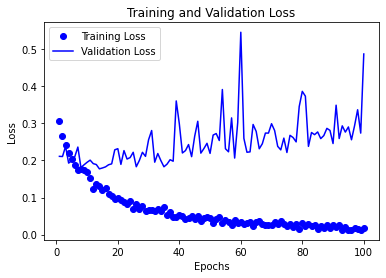

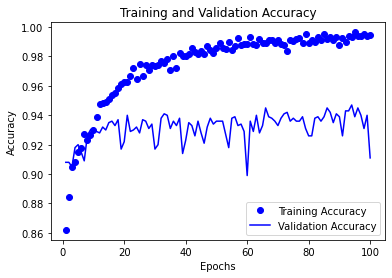

In [32]:
create_val_plots(history)

Using a pretrained CNN with data augmentation and fine tuning has improved the validation set accuracy to 91.10%, compared to 81.90% using data augmentation alone. 

In this notebook it appears that the model is overfitting to the training set, and the validation set accuracy does not improve much past the 20th epoch. In the original code that this notebook is based on [1], this is not the case and the validation set accuracy is in the 96% to 97% range.

In [33]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test accuracy: ', test_acc)

Found 1000 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test accuracy:  0.9150000214576721


In [34]:
model.save('cats_and_dogs_small_finetuned.h5')

After evaluating the fine tuned model configuration on the test set, the accuracy is 91.5%, which is an 18% improvement over the baseline model.

An important note is that in the original code that this notebook is based on [1], the test accuracy is 97%. The reason for the discrepancy is unknown, since the same data and code is used in this notebook.

## 8. References

[1] F. Chollet, "Training a convnet from scratch on a small dataset," in  _Deep Learning with Python_ , 1st ed., Manning, 2018, pp. 130-159.